<a href="https://colab.research.google.com/github/cybersynergy-ds/Text2Image-generation/blob/main/Digit_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Classification Using Convolutional Neural Networks (CNNs)**

Digit classification is one of the most well-known machine learning tasks, often used to demonstrate the power of deep learning techniques. It involves training a model to correctly identify handwritten digits (0–9) based on a dataset of images. Convolutional Neural Networks (CNNs) have proven to be exceptionally effective for image classification tasks because of their ability to automatically extract hierarchical features (such as edges, textures, and shapes) from images.

In this article, we'll explore how CNNs can be applied to the task of digit classification using a popular dataset known as MNIST (Modified National Institute of Standards and Technology), which consists of 28x28 pixel grayscale images of handwritten digits.

# **What is MNIST Dataset?**

The MNIST dataset is a large database of handwritten digits, commonly used for training image processing systems. It contains 60,000 training images and 10,000 test images, all of which are labeled with the correct digit (0-9). Each image in the dataset is 28x28 pixels, representing a single digit in a grayscale format (i.e., with pixel values ranging from 0 for black to 255 for white). These images are ideal for testing image recognition algorithms and form a benchmark in the machine learning community.

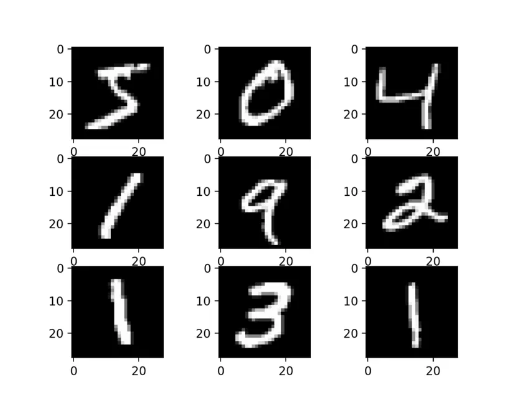

In [3]:
import pandas as pd
from tensorflow.keras.utils import to_categorical, Progbar
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import time


df = pd.read_csv('train.csv') # Load the CSV file


labels = df['label'].values # Extract labels (first column)


pixels = df.iloc[:, 1:].values # Extract pixel data (remaining columns)


images = pixels.reshape(-1, 28, 28, 1) # Reshape the pixel data to 28x28 images (784 -> 28x28)

images = images.astype('float32') / 255.0 # Normalize pixel values b/w 0 and 1

# One-hot encode labels
labels = to_categorical(labels, num_classes=10)  # For 10 classes (digits 0-9)

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # 32 filters, 3x3 kernel
model.add(MaxPooling2D((2, 2)))  # Max-pooling layer with 2x2 pool size

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))  # 64 filters, 3x3 kernel
model.add(MaxPooling2D((2, 2)))  # Max-pooling layer

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))  # 128 filters, 3x3 kernel
model.add(MaxPooling2D((2, 2)))  # Max-pooling layer

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected Layer -Dense
model.add(Dense(128, activation='relu'))  # Fully connected layer with 128 neurons
model.add(Dropout(0.5))  # Dropout with 50% rate to prevent overfitting

# Output Layer Softmax activation for classification
model.add(Dense(10, activation='softmax'))  # 10 classes for digit classification (0-9)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to understand the architecture
model.summary()

# Create the Progbar callback (to track batches)
progbar = Progbar(target=len(X_train) // 64)  # Target is the number of batches per epoch

# Custom callback to track iteration progress and time
class IterationCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch  # Set the current epoch
        self.start_time = time.time()  # Start the timer at the beginning of each epoch
        print(f"Starting Epoch {self.epoch + 1}...")

    def on_batch_end(self, batch, logs=None):
        progbar.update(batch + 1) # Update the progress bar with the current batch number

        # Print batch info after every batch
        print(f"Epoch {self.epoch + 1}, Batch {batch + 1}: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}")

    def on_epoch_end(self, epoch, logs=None): # Calculate elapsed time for the epoch
        elapsed_time = time.time() - self.start_time
        print(f"End of Epoch {self.epoch + 1}, Validation Loss: {logs['val_loss']:.4f}, Validation Accuracy: {logs['val_accuracy']:.4f}")
        print(f"Epoch {self.epoch + 1} took {elapsed_time:.2f} seconds.\n")  # Print the time elapsed

# Train the model with the custom callback
history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_val, y_val), verbose=0,
                    callbacks=[IterationCallback()])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

Starting Epoch 1...
  1/525 ━━━━━━━━━━━━━━━━━━━━ 54:27 6s/stepEpoch 1, Batch 1: loss = 2.3138, accuracy = 0.0469
Epoch 1, Batch 2: loss = 2.3058, accuracy = 0.0781
Epoch 1, Batch 3: loss = 2.2955, accuracy = 0.0938
Epoch 1, Batch 4: loss = 2.2898, accuracy = 0.1094
Epoch 1, Batch 5: loss = 2.2866, accuracy = 0.1219
Epoch 1, Batch 6: loss = 2.2828, accuracy = 0.1224
Epoch 1, Batch 7: loss = 2.2825, accuracy = 0.1317
Epoch 1, Batch 8: loss = 2.2809, accuracy = 0.1328
Epoch 1, Batch 9: loss = 2.2734, accuracy = 0.1528
Epoch 1, Batch 10: loss = 2.2652, accuracy = 0.1641
Epoch 1, Batch 11: loss = 2.2628, accuracy = 0.1648
Epoch 1, Batch 12: loss = 2.2567, accuracy = 0.1745
Epoch 1, Batch 13: loss = 2.2510, accuracy = 0.1827
Epoch 1, Batch 14: loss = 2.2432, accuracy = 0.1942
Epoch 1, Batch 15: loss = 2.2354, accuracy = 0.2000
Epoch 1, Batch 16: loss = 2.2292, accuracy = 0.2041
Epoch 1, Batch 17: loss = 2.2213, accuracy = 0.2096
 18/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  Epoch 1, Batch 18: lo

In [4]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1497
Validation Loss: 0.1503
Validation Accuracy: 95.40%


In [5]:
# Check what keys are in the history
print(history.history.keys())
print("Training Accuracy History:", history.history['accuracy'])
print("Validation Accuracy History:", history.history['val_accuracy'])
# Train the model for more epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Check the accuracy and loss for each epoch
print("Training Accuracy History:", history.history['accuracy'])
print("Validation Accuracy History:", history.history['val_accuracy'])



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Training Accuracy History: [0.8583035469055176]
Validation Accuracy History: [0.9540476202964783]
Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9546 - loss: 0.1511 - val_accuracy: 0.9729 - val_loss: 0.0888
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9715 - loss: 0.0977 - val_accuracy: 0.9754 - val_loss: 0.0790
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9770 - loss: 0.0786 - val_accuracy: 0.9785 - val_loss: 0.0694
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9819 - loss: 0.0625 - val_accuracy: 0.9840 - val_loss: 0.0550
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9833 - loss: 0.0539 - val_accuracy: 0.9852 - val_loss: 0.0516
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0433 - val_accuracy: 0.9839 - val_loss: 0.0545
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9889 - l

Training history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


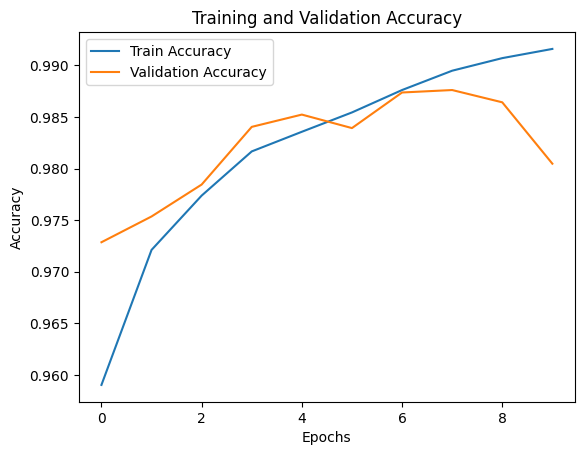

In [6]:
import matplotlib.pyplot as plt

# Ensure that training history contains accuracy and validation accuracy
print("Training history keys:", history.history.keys())

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [7]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.0753
Validation Loss: 0.0791
Validation Accuracy: 98.05%


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Step 1: Load the test data
df_test = pd.read_csv('test.csv')

# Step 2: Preprocess the test data
# Get the pixel values from the dataframe (all columns represent pixels)
X_test = df_test.values  # This will be a (num_samples, 784) array

# Normalize the pixel values (assuming you normalized your training data the same way)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)  # Normalize pixel values to have mean 0 and std 1

# Reshape the data to match the model's input shape
# Since we expect 28x28 images and a grayscale channel, we reshape it into (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)  # For CNN, input shape should be (28, 28, 1) for each image

# Step 3: Make predictions on the test set
predictions = model.predict(X_test)

# Step 4: If it's a classification task, get the predicted class labels
# If your model outputs probabilities for multiple classes (like for multi-class classification)
predicted_classes = predictions.argmax(axis=1)  # Get the class with the highest probability

# Step 5: Save predictions to a CSV file
# Since there is no 'id' column, we'll just save the predictions
df_predictions = pd.DataFrame({
    'prediction': predicted_classes  # Only saving the predicted class labels
})

# Save the predictions to a CSV file
df_predictions.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'.")
model.save('digit_cnn_model.h5')  # Save the model in the current directory


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Predictions saved to 'predictions.csv'.


In [9]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load the pre-trained model
model = tf.keras.models.load_model('digit_cnn_model.h5')  # Replace with your model's path

# Step 2: Preprocess the input image
def preprocess_image(image_path):
    """
    Preprocesses an input image for prediction. Converts to grayscale, inverts colors,
    resizes, normalizes, and reshapes the image to match model input.
    """
    # Open the image
    image = Image.open(image_path)

    # Convert to grayscale if the image is RGB or RGBA (handle both)
    if image.mode != 'L':  # 'L' mode is grayscale
        image = image.convert('L')  # Convert to grayscale

    # Invert colors (white becomes black, black becomes white)
    image = Image.eval(image, lambda x: 255 - x)

    # Resize the image to 28x28 pixels (the size the model expects)
    image = image.resize((28, 28))

    # Convert the image to a NumPy array
    image_data = np.array(image)

    # Normalize the image pixel values to be between 0 and 1
    # If the model was trained with pixel values between 0 and 1 (not scaled), we do the same here.
    image_data = image_data / 255.0  # Normalize to [0, 1]

    # Reshape the image to match the model input shape (28, 28, 1)
    image_data = image_data.reshape(1, 28, 28, 1)  # Add batch dimension for prediction

    return image_data


# Step 3: Predict the class of the input image
def predict_image_class(image_path):
    """
    Makes a prediction for the class of the input image using the pre-trained model.
    """
    # Preprocess the image
    processed_image = preprocess_image(image_path)

    # Make predictions using the model
    prediction = model.predict(processed_image)

    # Check the raw prediction probabilities (for debugging)
    print(f"Raw prediction: {prediction}")  # This prints the probability distribution across all classes

    # Get the predicted class (highest probability class)
    predicted_class = prediction.argmax(axis=1)  # For classification tasks

    return predicted_class[0]  # Return the predicted class


# Step 4: Display the image and the predicted class
def display_image_and_prediction(image_path):
    """
    Displays the input image and prints the predicted class.
    """
    # Open the image
    image = Image.open(image_path)

    # Convert to grayscale if the image is RGB or RGBA
    if image.mode != 'L':  # 'L' mode is grayscale
        image = image.convert('L')  # Convert to grayscale

    # Invert colors (white becomes black, black becomes white)
    image = Image.eval(image, lambda x: 255 - x)

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

    # Get the predicted class
    predicted_class = predict_image_class(image_path)
    print(f"The predicted class is: {predicted_class}")




# **RANDOM IMAGE DATA GOT FROM INTERNET**

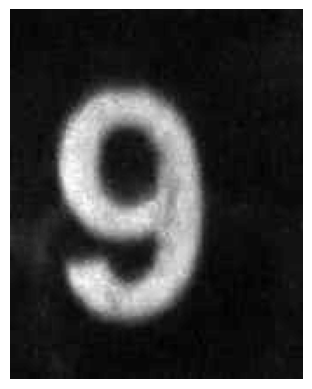

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Raw prediction: [[0.04742998 0.00322894 0.01898778 0.01069706 0.01005388 0.01532382
  0.02368215 0.01021135 0.76614517 0.09423993]]
The predicted class is: 8


In [15]:
#oops some error in prediction but can be rulled out after more training
image_path = '9.jpg'  # Replace with the path to the image you want to classify
display_image_and_prediction(image_path)

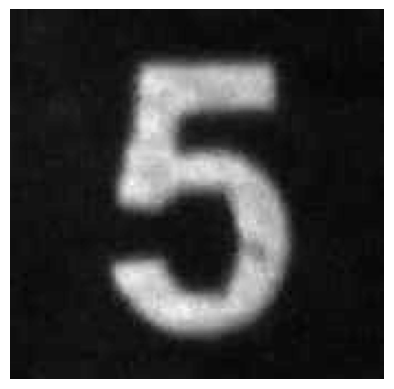

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Raw prediction: [[0.0317205  0.00597608 0.01019905 0.01175942 0.00315577 0.6787017
  0.10438789 0.0022679  0.1356733  0.01615839]]
The predicted class is: 5


In [11]:

image_path = '5.jpg'  # Replace with the path to the image you want to classify
display_image_and_prediction(image_path)

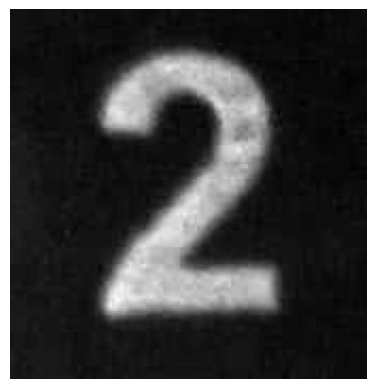

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Raw prediction: [[0.02341538 0.01721561 0.65547997 0.01209641 0.00415661 0.00478497
  0.04312681 0.02195925 0.2153159  0.00244914]]
The predicted class is: 2


In [12]:

image_path = '2.jpg'  # Replace with the path to the image you want to classify
display_image_and_prediction(image_path)

# **GOT THE CORRECT PREDICTION!!!!**